In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
CFL = 0.5

# Set constant temp, and constant vel, create pressure jump
T = 300 # K
u = 400 # m/s
P0 = 100000 # Pa
s0 = 100

gamma = 1.4
R = 287 # J/g*K, for air

cp = 1 # J/g
cv = 0.718 # J/g 

# Derived variables
a = np.sqrt(gamma*R*T)
rho0 = P0/(R*T)

In [4]:
s = s0
rho = rho0
P = P0

w1 = u + 2*a/(gamma - 1)
w2 = u - 2*a/(gamma - 1)
w3 = s

W = np.array([[w1], [w2], [w3]])

W

array([[ 2135.94354747],
       [-1335.94354747],
       [  100.        ]])

In [8]:
t = 0.01
Cd = 0.47
dia = 115e-6 # m

A = np.pi/4 * dia**2

drag0 = 0.5*rho0*u*u*Cd*A

f0 = -drag0

c1 = a*f0*rho0
c2 = -a*f0*rho0
c3 = 0

t1 = (w1 - P)/c1
t2 = (w2 - P)/c2
t3 = (w3 - s)/(c3 + 1e-9)

print('t1: ', t1)
print('t2: ', t2)
print('t3: ', t3)

t1:  535045.2533706814
t2:  -554026.8568083723
t3:  0.0


# ChatGPT Riemann Solver

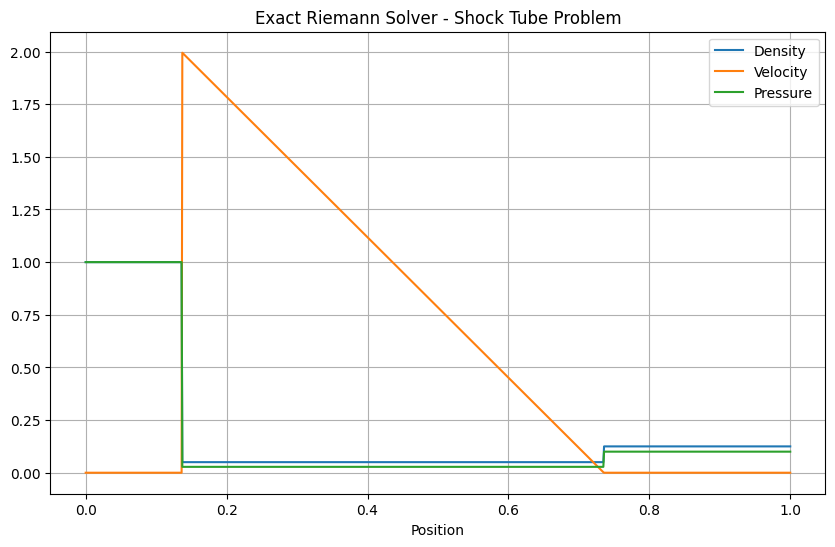

In [29]:
def riemann_solver(p_l, rho_l, u_l, p_r, rho_r, u_r, gamma=1.4, t=0.0, num_points=1000):
    """
    One-dimensional Riemann solver for a shock tube problem.
    
    Parameters:
        p_l, rho_l, u_l: Pressure, density, and velocity on the left side.
        p_r, rho_r, u_r: Pressure, density, and velocity on the right side.
        gamma: Specific heat ratio (default: 1.4 for air).
        t: Time at which the solution is computed (default: 0.0).
        num_points: Number of points to sample the solution (default: 1000).
        
    Returns:
        x: Array of spatial points.
        rho: Array of density values.
        u: Array of velocity values.
        p: Array of pressure values.
    """
    # Calculate the sound speeds on both sides
    c_l = np.sqrt(gamma * p_l / rho_l)
    c_r = np.sqrt(gamma * p_r / rho_r)

    # Calculate the wave speeds (Riemann invariants)
    w_l = u_l - 2 * c_l / (gamma - 1)
    w_r = u_r + 2 * c_r / (gamma - 1)

    # Find the contact discontinuity location
    x_cd = (w_l * rho_l * u_l - w_r * rho_r * u_r + p_r - p_l) / (rho_l * w_l - rho_r * w_r)

    # Initialize arrays to store the solution
    x = np.linspace(0, 1, num_points)
    rho = np.zeros_like(x)
    u = np.zeros_like(x)
    p = np.zeros_like(x)

    # Evaluate solution in different regions
    for i in range(num_points):
        if x[i] <= x_cd:
            # Left rarefaction wave
            if t <= x[i] / c_l:
                rho[i] = rho_l * (2 / (gamma + 1) + (gamma - 1) / (gamma + 1) * u_l / c_l * (x[i] / c_l - t))**(2 / (gamma - 1))
                u[i] = 2 / (gamma + 1) * (c_l + (gamma - 1) / 2 * u_l + x[i] / t)
                p[i] = p_l * (2 / (gamma + 1) + (gamma - 1) / (gamma + 1) * u_l / c_l * (x[i] / c_l - t))**(2 * gamma / (gamma - 1))
            else:
                rho[i] = rho_l * (1 + (gamma - 1) / 2 * u_l / c_l)**(2 / (gamma - 1))
                u[i] = u_l
                p[i] = p_l * (1 + (gamma - 1) / 2 * u_l / c_l)**(2 * gamma / (gamma - 1))
        else:
            # Right rarefaction wave
            if t <= (1 - x[i]) / c_r:
                rho[i] = rho_r * (2 / (gamma + 1) - (gamma - 1) / (gamma + 1) * u_r / c_r * ((1 - x[i]) / c_r - t))**(2 / (gamma - 1))
                u[i] = 2 / (gamma + 1) * (-c_r + (gamma - 1) / 2 * u_r + (1 - x[i]) / t)
                p[i] = p_r * (2 / (gamma + 1) - (gamma - 1) / (gamma + 1) * u_r / c_r * ((1 - x[i]) / c_r - t))**(2 * gamma / (gamma - 1))
            else:
                rho[i] = rho_r * (1 - (gamma - 1) / 2 * u_r / c_r)**(2 / (gamma - 1))
                u[i] = u_r
                p[i] = p_r * (1 - (gamma - 1) / 2 * u_r / c_r)**(2 * gamma / (gamma - 1))

    return x, rho, u, p

# Example usage
p_l = 1.0
rho_l = 1.0
u_l = 0.0

p_r = 0.1
rho_r = 0.125
u_r = 0.0

gamma = 1.4
t = 0.25

x, rho, u, p = riemann_solver(p_l, rho_l, u_l, p_r, rho_r, u_r, gamma, t)

# Plot the solution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x, rho, label='Density')
plt.plot(x, u, label='Velocity')
plt.plot(x, p, label='Pressure')
plt.xlabel('Position')
plt.legend()
plt.grid()
plt.title('Exact Riemann Solver - Shock Tube Problem')
plt.show()